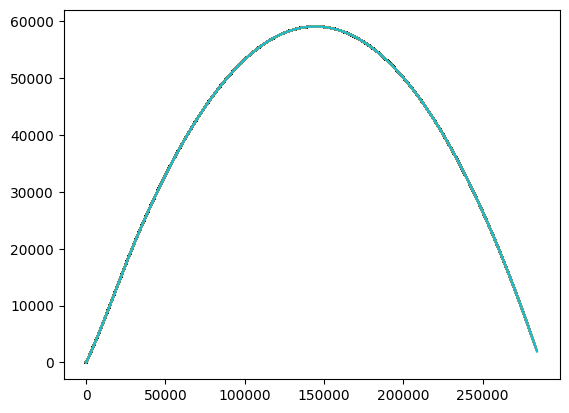

In [13]:
from matplotlib import pyplot as pp
import numpy as np

MODEL_G = 9.8
MODEL_DT = 0.1


class Body:
    def __init__(self, x, y, vx, vy):
        """
        Создаем класс тела:
        x - x-координата
        y - y-координата
        vx - проекция скорости на Ox
        vy - проекция скорости на Oy
        """
        
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.traj_x = []
        self.traj_y = []
    
    def advance(self):
        self.vy -= MODEL_G * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.x += self.vx * MODEL_DT
        self.traj_x.append(self.x)
        self.traj_y.append(self.y)


class Rocket(Body):

    def __init__(self, x, y, vx, vy):
        """
        Создаем класс ракеты:
        alpha - наклон ракеты 
        m - масса
        outgo - расход топлива
        speed - скорость истекающих газов
        """
        super().__init__(x, y, vx, vy)
        self.alpha = np.pi / 4
        self.m = 12500
        self.outgo = 250
        self.speed = 1600       

    def advance(self):
        super().advance()
        if self.m < 4000:
            return
        self.vy += MODEL_DT * (self.outgo * self.speed * np.sin(self.alpha)) / self.m
        self.vx += MODEL_DT * (self.outgo * self.speed * np.cos(self.alpha)) / self.m
        self.m -= self.outgo * MODEL_DT



r = Rocket(0, 0, 0, 0)
for i in np.arange (0, 240, MODEL_DT):
    r.advance()
    pp.plot(r.traj_x, r.traj_y)


pp.show()